Balloon Flight Prediction Tool



In [1]:
import sys
import os
import pathlib
import xml.dom.minidom as md
from pathlib import Path
import kml2geojson as kg
import folium
import json
import geojson
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
from datetime import datetime, timedelta, time
from astra.simulator import *
import statistics
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt

C:\Users\bcarroll\AppData\Local\Continuum\anaconda3\lib\site-packages\deap-1.2.2-py3.6.egg\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.


In [2]:
#


In [3]:
np.random.seed(62)

R = 6373.0

add check to ensure balloon will burst before running set of trajectories

In [4]:
for x in range(8):
    launch_datetime = datetime.now() + timedelta(hours=24*x)
    simEnvironment = forecastEnvironment(launchSiteLat=35.39730,      # deg
                                         launchSiteLon=-90.9965,     # deg
                                         launchSiteElev=100,           # m
                                         dateAndTime=launch_datetime,
                                         forceNonHD=True,
                                         debugging=True)


    simFlight = flight(environment=simEnvironment,
                       balloonGasType='Helium',
                       balloonModel='HW1600',
                       nozzleLift=7.5,                                # kg
                       payloadTrainWeight=5.4,                    # kg
                       parachuteModel='SPH54',
                       numberOfSimRuns=100,
                       trainEquivSphereDiam=0.3,                    # m
                       floatingFlight=False,
                       excessPressureCoeff=1,
                       #outputFile=os.path.join('.', 'astra_output'),
                       outputFile= os.path.join('data', 'balloon_track' + str(x) + '.kml'),
                       debugging=False,
                       log_to_file=True)

    simFlight.run()
#simFlight.write_CSV(os.path.join('.', 'testing'))

2018-11-22 13:14:25,769.769 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:14:25,772.772 DEBUG:astra.weather Using UTC time 22/11/18 13:14
2018-11-22 13:14:25,776.776 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:14:25,781.781 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:14:25,786.786 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:14:25,789.789 DEBUG:astra.weather     Launch time: 2018-11-22 13:14:24.436945
2018-11-22 13:14:25,792.792 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:14:25,796.796 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[0:1][0:46][244:256][526:550]


2018-11-22 13:14:28,307.307 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:14:31,313.313 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:14:32,527.527 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:14:33,977.977 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:14:36,627.627 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:14:37,713.713 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:14:37,715.715 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track0_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:16:18,210.210 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:16:18,213.213 DEBUG:astra.weather Using UTC time 23/11/18 13:16
2018-11-22 13:16:18,217.217 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:16:18,221.221 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:16:18,226.226 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:16:18,229.229 DEBUG:astra.weather     Launch time: 2018-11-23 13:16:17.843524
2018-11-22 13:16:18,232.232 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:16:18,234.234 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[8:9][0:46][244:256][526:550]


2018-11-22 13:16:21,898.898 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:16:25,171.171 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:16:25,178.178 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:16:25,220.220 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:16:25,950.950 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:16:26,959.959 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:16:26,968.968 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track1_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:18:09,006.6 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:18:09,007.7 DEBUG:astra.weather Using UTC time 24/11/18 13:18
2018-11-22 13:18:09,009.9 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:18:09,011.11 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:18:09,013.13 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:18:09,015.15 DEBUG:astra.weather     Launch time: 2018-11-24 13:18:08.730846
2018-11-22 13:18:09,016.16 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:18:09,018.18 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[16:17][0:46][244:256][526:550]


2018-11-22 13:18:12,814.814 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:18:18,017.17 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:18:18,023.23 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:18:18,036.36 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:18:18,445.445 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:18:19,141.141 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:18:19,141.141 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track2_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:19:57,855.855 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:19:57,857.857 DEBUG:astra.weather Using UTC time 25/11/18 13:19
2018-11-22 13:19:57,858.858 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:19:57,860.860 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:19:57,862.862 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:19:57,864.864 DEBUG:astra.weather     Launch time: 2018-11-25 13:19:57.475928
2018-11-22 13:19:57,866.866 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:19:57,869.869 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[24:25][0:46][244:256][526:550]


2018-11-22 13:20:01,848.848 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:20:05,336.336 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:20:05,341.341 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:20:06,360.360 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:20:06,774.774 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:20:07,501.501 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:20:07,502.502 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track3_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:21:48,047.47 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:21:48,048.48 DEBUG:astra.weather Using UTC time 26/11/18 13:21
2018-11-22 13:21:48,050.50 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:21:48,052.52 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:21:48,054.54 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:21:48,056.56 DEBUG:astra.weather     Launch time: 2018-11-26 13:21:47.650178
2018-11-22 13:21:48,059.59 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:21:48,061.61 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[32:33][0:46][244:256][526:550]


2018-11-22 13:21:53,083.83 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:21:56,853.853 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:21:58,086.86 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:21:58,538.538 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:22:00,557.557 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:22:01,813.813 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:22:01,815.815 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track4_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:23:41,099.99 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:23:41,100.100 DEBUG:astra.weather Using UTC time 27/11/18 13:23
2018-11-22 13:23:41,102.102 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:23:41,104.104 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:23:41,106.106 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:23:41,108.108 DEBUG:astra.weather     Launch time: 2018-11-27 13:23:40.835300
2018-11-22 13:23:41,110.110 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:23:41,113.113 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[40:41][0:46][244:256][526:550]


2018-11-22 13:23:43,842.842 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:23:47,450.450 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:23:47,456.456 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:23:47,663.663 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:23:50,315.315 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:23:51,053.53 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:23:51,054.54 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track5_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:25:27,394.394 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:25:27,397.397 DEBUG:astra.weather Using UTC time 28/11/18 13:25
2018-11-22 13:25:27,400.400 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:25:27,404.404 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:25:27,408.408 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:25:27,410.410 DEBUG:astra.weather     Launch time: 2018-11-28 13:25:27.130906
2018-11-22 13:25:27,413.413 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:25:27,416.416 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[48:49][0:46][244:256][526:550]


2018-11-22 13:25:30,242.242 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:25:35,595.595 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:25:35,603.603 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:25:35,611.611 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:25:36,608.608 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:25:38,591.591 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:25:38,593.593 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track6_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


2018-11-22 13:27:15,531.531 DEBUG:astra.weather Fetched time zone data about the launch site: UTC offset is 0.000000 hours
2018-11-22 13:27:15,534.534 DEBUG:astra.weather Using UTC time 29/11/18 13:27
2018-11-22 13:27:15,537.537 INFO:astra.weather Preparing to download weather data for parameters:
2018-11-22 13:27:15,541.541 DEBUG:astra.weather     Launch site Latitude: 35.3973
2018-11-22 13:27:15,544.544 DEBUG:astra.weather     Launch site Longitude: -90.9965
2018-11-22 13:27:15,548.548 DEBUG:astra.weather     Launch time: 2018-11-29 13:27:15.208777
2018-11-22 13:27:15,551.551 DEBUG:astra.GFS Attempting to download cycle data.
2018-11-22 13:27:15,555.555 DEBUG:astra.GFS Requesting URL: http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20181122/gfs_0p50_12z.ascii?tmpprs[56:57][0:46][244:256][526:550]


2018-11-22 13:27:20,044.44 DEBUG:astra.GFS Requesting weather urls asynchronously: status will be sent to requests logger
2018-11-22 13:27:23,110.110 DEBUG:astra.GFS Updating Download progress: 25.0%% complete


2018-11-22 13:27:25,157.157 DEBUG:astra.GFS Updating Download progress: 50.0%% complete


2018-11-22 13:27:26,385.385 DEBUG:astra.GFS Updating Download progress: 75.0%% complete


2018-11-22 13:27:26,393.393 DEBUG:astra.GFS Updating Download progress: 100.0%% complete


Weather downloaded.


2018-11-22 13:27:27,243.243 DEBUG:astra.GFS Forecast successfully downloaded!
2018-11-22 13:27:27,244.244 DEBUG:astra.weather GFS data successfully downloaded.


Preparing simulation
The simulation is running. Current progress: 99%data\balloon_track7_markers.kml
The simulation is running. Current progress: 100%
Simulation completed.


In [5]:
kw = {'location': [simEnvironment.launchSiteLat, simEnvironment.launchSiteLon], 'zoom_start': 8,}

In [6]:
out_dir = Path('./results')
m = folium.Map(tiles='OpenStreetMap', **kw)
h = folium.Map(tiles='OpenStreetMap', **kw)


import pandas as pd




disthist = []
for x in range(8):
    kml_path = Path(os.path.join('data', 'balloon_track%s' % x + '.kml'))
    mark_path = Path(os.path.join('data', 'balloon_track%s' % x + '_markers.kml'))

    
    layers = kg.convert(kml_path, out_dir)
    marklayers = kg.convert(mark_path, out_dir)

In [7]:
for x in range(8):
    impact = []
    lon = []
    lat = []
    lon_sum = 0
    lat_sum = 0
    track = os.path.join('results', 'balloon_track%s.geojson' % x)
    markers = os.path.join('results', 'balloon_track%s_markers.geojson' % x)


    #tracks = folium.GeoJson(track)

    #tracks.add_to(m)
    
    with open(markers) as f:
        landings = json.load(f)



    for feature in landings['features']:
        if feature['properties']['name'].find('landing') > 0:
            coords = feature['geometry']['coordinates']
            #print(coords)
            impact.append([coords[1],coords[0]])
            lon.append(coords[1])
            lat.append(coords[0])
            #llon.append(spot[1])
            #print(coords)
            lon_sum += coords[1]
            lat_sum += coords[0]
            
            lat1 = radians(coords[1])
            lon1 = radians(coords[0])
            lon2 = radians(simEnvironment.launchSiteLon)
            lat2 = radians(simEnvironment.launchSiteLat)
            
            dlon = lon2 - lon1
            dlat = lat2 - lat1

            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))

            distance = R * c
            disthist.append(distance)
            print(distance)

    lonerr = statistics.stdev(lon)
    laterr = statistics.stdev(lat)

    #print(laterr, lon)

    loncent = lon_sum / len(impact)
    latcent = lat_sum / len(impact)

    #print(impact)
    #print(loncent, latcent)
    #print(impact)

    folium.CircleMarker([loncent,latcent], radius=10, color='black').add_to(m)
    #marks = folium.GeoJson(markers)

    #marks.add_to(m)
    latp = []
    lonp = []

    latp.append([loncent-lonerr,latcent])
    latp.append([loncent+lonerr,latcent])
    lonp.append([loncent,latcent-laterr])
    lonp.append([loncent,latcent+laterr])

    folium.PolyLine(latp, color="green", weight=2.5, opacity=1).add_to(m)
    folium.PolyLine(lonp, color="green", weight=2.5, opacity=1).add_to(m)
    #print(disthist)
    

    HeatMap(impact).add_to(h)
    folium.Marker([loncent,latcent]).add_to(h)
    
    





78.50999648516924
57.62931394536968
68.77937419966096
62.92492921825442
78.13407464821417
77.12250564794833
80.05165437462034
63.283523588737744
78.30655647248707
82.51359065943083
61.75210913031283
62.53171156046679
75.26809039264253
72.93390431426548
87.44406901868368
73.83493922576555
71.27212473734667
82.1021064973395
51.84159399796545
98.07008414998124
67.25343777516036
69.76811828788307
71.43017063636832
88.0019119857025
85.25090054331967
74.44779888602005
80.18503652940882
83.46671514545744
75.14245259927453
75.22258932990025
64.5218221027932
72.716087313059
77.51398344392209
83.06376226864819
84.54619628221899
63.44789575102591
66.56606900982902
77.8058182612079
69.91193375701036
75.20705360364924
69.59225716915326
77.34638299183241
71.39658297095997
79.35172930228032
68.10084081478179
77.81152396123824
67.39227884380789
72.16839535382974
65.54169496913165
83.10894550181968
67.5079962512682
83.92950106430122
73.32686910429273
64.32826335368496
64.06045865088697
82.5691516394306

In [8]:
m

In [9]:
h

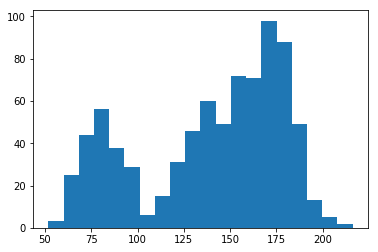

In [13]:
n_bins = 20

fig, axs = plt.subplots()

# We can set the number of bins with the `bins` kwarg
axs.hist(disthist, bins=n_bins)

plt.show()

In [11]:
m

In [12]:
h = folium.Map(tiles='OpenStreetMap', location=[loncent,latcent], zoom_start=8,)

HeatMap(impact).add_to(h)
folium.Marker([loncent,latcent]).add_to(h)

h

In [ ]:
h.save(os.path.join('results', 'map.html'))
